<a href="https://colab.research.google.com/github/Alinabelko/modeling6199/blob/main/%D0%9C%D0%BE%D0%B4%D0%B5%D0%BB%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy.random import seed
from numpy.random import rand
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt


alpha = 0.5

Генерации 1000 случайных чисел

In [ ]:
seed(127)

values = rand(1000)
print(values)

[5.23833320e-01 3.99629741e-02 1.85965312e-01 7.72790648e-01
 5.52148879e-01 8.62768991e-02 4.41394757e-01 7.15549151e-01
 6.70553153e-01 4.72845648e-01 9.06160904e-01 1.04918458e-01
 1.74731555e-01 8.89199927e-02 6.49656140e-01 7.13874633e-02
 4.59992914e-01 9.06690138e-01 9.41838456e-02 6.32883627e-01
 2.66187349e-01 9.16438807e-01 1.27525220e-01 6.86033509e-02
 6.72402241e-01 2.02414841e-01 4.81879713e-01 2.37340972e-01
 7.92734988e-01 3.45348650e-01 9.53987416e-01 6.00293673e-01
 3.92081866e-01 6.38534668e-01 8.81454678e-01 2.02340809e-01
 5.97678145e-01 4.24638065e-01 2.00960367e-01 1.62136112e-01
 4.87106440e-01 3.51808992e-02 4.10488918e-01 8.59172143e-01
 3.96545840e-01 2.42111828e-01 9.36564273e-01 7.54710241e-01
 9.94561378e-01 1.14991023e-01 1.59460034e-01 7.00526171e-01
 5.23947667e-01 1.74556349e-01 4.37065060e-01 6.97712495e-01
 5.13723449e-01 7.11108479e-01 2.92251308e-01 3.52110901e-01
 3.09195808e-01 7.23574984e-01 1.64622115e-01 2.28922295e-01
 1.44688739e-01 1.958229

Генерируем обратные числа

In [ ]:
reverse_values = []
for val in values:
  if(val == 0):
    reversed_val = 0
  else:
    reversed_val = (-1 / alpha) * math.log(1 - val)

  reverse_values.append(reversed_val)
print(reverse_values)

[1.4839746357656678, 0.08156685334045466, 0.4115045997663391, 2.9637668616063606, 1.606588840679273, 0.18045541295656956, 1.164624479433958, 2.5143896094744433, 2.2206805043772007, 1.2805237723858673, 4.7323474200624425, 0.22168091286574615, 0.38409311474724245, 0.18624912399981183, 2.0976802972635835, 0.14812740574411615, 1.2323460344170214, 4.74365895752161, 0.19783782734138916, 2.004152775711348, 0.6190030537717058, 4.964352132613789, 0.2728430611524605, 0.14214009227134133, 2.2319375327320983, 0.45233333608669213, 1.3150956992999558, 0.5418884610881418, 3.1475141098822794, 0.8473049505560762, 6.15768071364627, 1.834050368229917, 0.9954301079370412, 2.035178286601266, 4.264919857460375, 0.45214770341735383, 1.8210057546783518, 1.1055119663958382, 0.4486894611818611, 0.35379923395435575, 1.3353738830569717, 0.07162931104613013, 1.0569235195251123, 3.9204340179403463, 1.0101703961801312, 0.5544388703881051, 5.515456132127463, 2.810630153420611, 10.428459290547819, 0.24431498004469307,

In [ ]:
max_val = max(reverse_values)
print("Максимальное значение:", max_val)
min_val = 0
step = (max_val - min_val)/11
print("Шаг:", step)

Максимальное значение: 13.77042476851083
Шаг: 1.2518567971373482


In [ ]:
intervals = np.arange(start=min_val, stop=max_val, step=step)
#функция np.arange не включает последнее значение
intervals = np.append(intervals, max_val)
print(intervals)

[ 0.          1.2518568   2.50371359  3.75557039  5.00742719  6.25928399
  7.51114078  8.76299758 10.01485438 11.26671117 12.51856797 13.77042477]


In [ ]:
values_count = []
for i in np.arange(11):
  count = np.count_nonzero(np.logical_and(reverse_values > intervals[i], reverse_values < intervals[i+1]))
  values_count.append(count)
print(values_count)

[480, 242, 119, 80, 31, 22, 13, 4, 5, 2, 1]


In [ ]:
count_n = [x/1000 for x in values_count]
print(count_n)

[0.48, 0.242, 0.119, 0.08, 0.031, 0.022, 0.013, 0.004, 0.005, 0.002, 0.001]


Статистическое распределение случайной величины

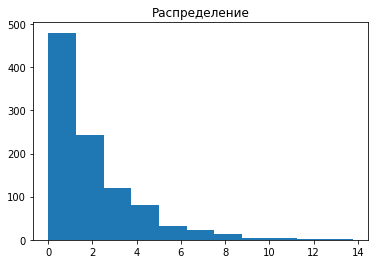

In [ ]:
plt.hist(reverse_values, bins=11)
plt.title("Гистограмма распределения моделируемой величины")
plt.show()

Плотность распределения

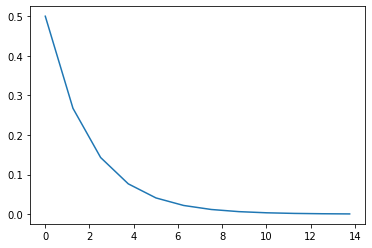

In [ ]:
density = [alpha*math.exp(-alpha*x) for x in intervals]
plt.plot(intervals, density)
plt.show()

Середины интервалов

In [ ]:
average_intervals = []
for i in np.arange(11):
  average = (intervals[i]+intervals[i+1])/2
  average_intervals.append(average)
print(average_intervals)

[0.6259283985686741, 1.8777851957060223, 3.1296419928433705, 4.381498789980719, 5.633355587118067, 6.885212384255415, 8.137069181392764, 9.38892597853011, 10.64078277566746, 11.892639572804807, 13.144496369942157]



Дельта на вхождения/n

In [ ]:
delta_count = [step*x for x in count_n]
print(delta_count)

[0.6008912626259271, 0.30294934490723824, 0.14897095885934444, 0.10014854377098786, 0.038807560711257794, 0.02754084953702166, 0.016274138362785524, 0.005007427188549393, 0.0062592839856867415, 0.0025037135942746966, 0.0012518567971373483]


Теоретическая вероятность попадания случайной величины в интервал

In [ ]:
pk = []
for i in np.arange(11):
  val = (1-math.exp(-alpha*intervals[i+1])) - (1-math.exp(-alpha*intervals[i]))
  pk.append(val)
print(pk)

[0.46523527681917387, 0.24879141402216054, 0.133044871649327, 0.07114770395818082, 0.03804728221214804, 0.020346344339962075, 0.010880507198701594, 0.005818511420180639, 0.0031115346489373197, 0.0016639389652065573, 0.0008898158601184925]


x2

In [ ]:
x2 = []
for i in np.arange(11):
  val = ((count_n[i] - pk[i])*(count_n[i] - pk[i])) / pk[i]
  x2.append(val)
print(x2)

[0.00046857377647042514, 0.0001853894540600608, 0.0014826457961190195, 0.0011014149558229993, 0.0013053280994089233, 0.00013440139399412915, 0.00041287135357916355, 0.0005683556405608526, 0.0011461551242510795, 6.787329431426581e-05, 1.3643884342330029e-05]


In [ ]:
sum_x2 = np.sum(x2)
print(sum_x2)

0.006886652772923249


In [ ]:
pirston = 23.2